In [63]:
import sys
from collections import OrderedDict

import numpy as np
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from gensim.similarities import Similarity
from gensim.utils import simple_preprocess
from gensim.test.utils import get_tmpfile
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm
import csv
from os import walk
import logging
import lexnlp.nlp.en.tokens
from gensim.models import TfidfModel
from gensim import corpora
import ray
import time

In [2]:
def progress_filter(record: logging.LogRecord) -> int:
    if 'PROGRESS' in record.msg:
        return 0
    else:
        return 1

logger = logging.getLogger()
handler = logging.StreamHandler(stream=sys.stdout)
handler.addFilter(progress_filter)
logger.addHandler(handler)
logger.setLevel(logging.INFO)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')

In [3]:
# simple_preprocess(doc, deacc=False, min_len=2, max_len=15):
# """Convert a document into a list of lowercase tokens, ignoring tokens that are too short or too long.

class MyCorpus:
    def __iter__(self):
        _, _, filenames = next(walk('/home/harry/PycharmProjects/congress/docs/'))
        for filename in tqdm(filenames):
            with open('/home/harry/PycharmProjects/congress/docs/'+filename, 'r') as bill:
                bill_reader = csv.reader(bill, delimiter='\t')
                for line in bill_reader:
                    yield TaggedDocument(simple_preprocess(line[1]), [line[0]])

In [3]:
class LexCorpus:
    def __iter__(self):
        _, _, filenames = next(walk('/home/harry/PycharmProjects/congress/docs/'))
        for filename in tqdm(filenames):
            with open('/home/harry/PycharmProjects/congress/docs/'+filename, 'r') as bill:
                bill_reader = csv.reader(bill, delimiter='\t')
                for line in bill_reader:
                    yield TaggedDocument(lexnlp.nlp.en.tokens.get_token_list(line[1], lowercase=True, stopword=True), [line[0]])

In [29]:
class LexTexts:
    def __iter__(self):
        _, _, filenames = next(walk('/home/harry/PycharmProjects/congress/docs/'))
        for filename in tqdm(filenames):
            with open('/home/harry/PycharmProjects/congress/docs/'+filename, 'r') as bill:
                bill_reader = csv.reader(bill, delimiter='\t')
                for line in bill_reader:
                    yield lexnlp.nlp.en.tokens.get_token_list(line[1], lowercase=True, stopword=True)

In [54]:
class LexIndex:
    def __iter__(self):
        _, _, filenames = next(walk('/home/harry/PycharmProjects/congress/docs/'))
        for filename in tqdm(filenames):
            with open('/home/harry/PycharmProjects/congress/docs/'+filename, 'r') as bill:
                bill_reader = csv.reader(bill, delimiter='\t')
                for line in bill_reader:
                    yield line[0]
docids = [docid for docid in LexIndex()]

  0%|          | 0/13357 [00:00<?, ?it/s]

In [40]:
class LexBowCorpus:
    def __init__(self):
        self.lex_dict = None

    def __iter__(self):
        _, _, filenames = next(walk('/home/harry/PycharmProjects/congress/docs/'))
        for filename in tqdm(filenames):
            with open('/home/harry/PycharmProjects/congress/docs/'+filename, 'r') as bill:
                bill_reader = csv.reader(bill, delimiter='\t')
                for line in bill_reader:
                    yield self.lex_dict.doc2bow(lexnlp.nlp.en.tokens.get_token_list(line[1], lowercase=True, stopword=True))

    def __call__(self, lex_dict):
        self.lex_dict = lex_dict
        if self.lex_dict is None:
            self.lex_dict = corpora.Dictionary(LexTexts())
        return self

In [4]:
# print first few from the corpus
test_corpus = LexCorpus()
count = 0
for vector in test_corpus:
    count += 1
    if count>10:
        break
    print(vector)

  0%|          | 0/13357 [00:00<?, ?it/s]

TaggedDocument(['whereas', 'nineveh', 'plain', 'wider', 'region', 'ancestral', 'homeland', 'assyrian', 'chaldean', 'syriac', 'christians', ',', 'yazidis', ',', 'shabak', ',', 'others', ',', 'lived', 'centuries', 'islamic', 'state', 'iraq', 'syria', '(', 'isis', ')', 'overran', 'occupied', 'much', 'region', '2014', ';'], ['data__115__bills__hres__hres1117_20_277'])
TaggedDocument(['whereas', 'christians', 'iraq', 'numbered', '1.5', 'million', '2003', 'dwindled', 'less', '200,000', 'today', ';'], ['data__115__bills__hres__hres1117_21_111'])
TaggedDocument(['whereas', 'united', 'states', 'president', ',', 'vice', 'president', ',', 'congress', ',', 'secretary', 'state', 'recognized', 'isis', 'committed', 'genocide', ',', 'war', 'crimes', ',', 'crimes', 'humanity', ',', 'crimes', 'christians', ',', 'yazidis', ',', 'religious', 'ethnic', 'minorities', ';'], ['data__115__bills__hres__hres1117_22_261'])
TaggedDocument(['whereas', 'atrocities', 'undertaken', 'specific', 'intent', 'bring', 'erad

In [30]:
# print first few from the corpus
dictionary = corpora.Dictionary(LexTexts())
corpus = LexBowCorpus()
count = 0
for x in iter(corpus(dictionary)):
    print(x)
    count += 1
    if count > 5:
        break

  0%|          | 0/13357 [00:00<?, ?it/s]

adding document #0 to Dictionary(0 unique tokens: [])
adding document #10000 to Dictionary(12438 unique tokens: ['(', ')', ',', '2014', ';']...)
adding document #20000 to Dictionary(17480 unique tokens: ['(', ')', ',', '2014', ';']...)
adding document #30000 to Dictionary(21564 unique tokens: ['(', ')', ',', '2014', ';']...)
adding document #40000 to Dictionary(24950 unique tokens: ['(', ')', ',', '2014', ';']...)
adding document #50000 to Dictionary(27370 unique tokens: ['(', ')', ',', '2014', ';']...)
adding document #60000 to Dictionary(28993 unique tokens: ['(', ')', ',', '2014', ';']...)
adding document #70000 to Dictionary(31301 unique tokens: ['(', ')', ',', '2014', ';']...)
adding document #80000 to Dictionary(32859 unique tokens: ['(', ')', ',', '2014', ';']...)
adding document #90000 to Dictionary(34797 unique tokens: ['(', ')', ',', '2014', ';']...)
adding document #100000 to Dictionary(36507 unique tokens: ['(', ')', ',', '2014', ';']...)
adding document #110000 to Dictiona

In [46]:
from gensim import models
corpus = LexBowCorpus()
tfidf = models.TfidfModel(corpus(dictionary))

collecting document frequencies


  0%|          | 0/13357 [00:00<?, ?it/s]

calculating IDF weights for 359010 documents and 60700 features (7118541 matrix non-zeros)


In [47]:
pivot_tfidf = models.TfidfModel(dictionary=dictionary, smartirs='nfu')

In [52]:
from gensim import similarities
index = similarities.Similarity('tfidf_index', tfidf[corpus(dictionary)], num_features=len(dictionary))
index.save('tfidf_index')

starting similarity index under tfidf_index


  0%|          | 0/13357 [00:00<?, ?it/s]

creating sparse index
creating sparse matrix from corpus
created <32768x60700 sparse matrix of type '<class 'numpy.float32'>'
	with 652577 stored elements in Compressed Sparse Row format>
creating sparse shard #0
saving index shard to tfidf_index.0
saving SparseMatrixSimilarity object under tfidf_index.0, separately None
saved tfidf_index.0
loading SparseMatrixSimilarity object from tfidf_index.0
loaded tfidf_index.0
creating sparse index
creating sparse matrix from corpus
created <32768x60700 sparse matrix of type '<class 'numpy.float32'>'
	with 650190 stored elements in Compressed Sparse Row format>
creating sparse shard #1
saving index shard to tfidf_index.1
saving SparseMatrixSimilarity object under tfidf_index.1, separately None
saved tfidf_index.1
loading SparseMatrixSimilarity object from tfidf_index.1
loaded tfidf_index.1
creating sparse index
creating sparse matrix from corpus
created <32768x60700 sparse matrix of type '<class 'numpy.float32'>'
	with 653005 stored elements in 

In [ ]:
index = similarities.Similarity.load('tfidf_index')

In [112]:
index = similarities.Similarity('tfidf_index_pivot', pivot_tfidf[corpus(dictionary)], num_features=len(dictionary))
index.save('tfidf_index_pivot')

starting similarity index under tfidf_index_pivot


  0%|          | 0/13357 [00:00<?, ?it/s]

creating sparse index
creating sparse matrix from corpus
created <32768x60700 sparse matrix of type '<class 'numpy.float32'>'
	with 652577 stored elements in Compressed Sparse Row format>
creating sparse shard #0
saving index shard to tfidf_index_pivot.0
saving SparseMatrixSimilarity object under tfidf_index_pivot.0, separately None
saved tfidf_index_pivot.0
loading SparseMatrixSimilarity object from tfidf_index_pivot.0
loaded tfidf_index_pivot.0
creating sparse index
creating sparse matrix from corpus
created <32768x60700 sparse matrix of type '<class 'numpy.float32'>'
	with 650190 stored elements in Compressed Sparse Row format>
creating sparse shard #1
saving index shard to tfidf_index_pivot.1
saving SparseMatrixSimilarity object under tfidf_index_pivot.1, separately None
saved tfidf_index_pivot.1
loading SparseMatrixSimilarity object from tfidf_index_pivot.1
loaded tfidf_index_pivot.1
creating sparse index
creating sparse matrix from corpus
created <32768x60700 sparse matrix of typ

In [ ]:
index = similarities.Similarity.load('tfidf_index_pivot')

In [53]:
lsi_tfidf = models.LsiModel(corpus(dictionary), id2word=dictionary, num_topics=300)
tmp_fname = get_tmpfile("lsi_model")
lsi_tfidf.save(tmp_fname)  # save model

using serial LSI version on this node
updating model with new documents


  0%|          | 0/13357 [00:00<?, ?it/s]

preparing a new chunk of documents
using 100 extra samples and 2 power iterations
1st phase: constructing (60700, 400) action matrix
orthonormalizing (60700, 400) action matrix
2nd phase: running dense svd on (400, 20000) matrix
computing the final decomposition
keeping 300 factors (discarding 3.931% of energy spectrum)
processed documents up to #20000
topic #0(472.651): 0.856*"," + 0.311*"(" + 0.301*")" + 0.117*"." + 0.110*"shall" + 0.085*"section" + 0.060*"secretary" + 0.051*";" + 0.049*"act" + 0.045*"subsection"
topic #1(285.536): 0.613*"(" + 0.599*")" + -0.467*"," + 0.096*"section" + 0.072*"b" + 0.070*"1" + 0.063*"subsection" + 0.059*"paragraph" + 0.049*"2" + 0.043*"described"
topic #2(122.393): -0.578*"shall" + -0.494*"." + -0.263*"secretary" + -0.176*"section" + 0.172*"," + -0.161*"act" + -0.157*"date" + 0.135*")" + 0.123*"(" + -0.115*"year"
topic #3(89.307): -0.531*"united" + -0.530*"states" + -0.406*"section" + -0.303*";" + 0.174*"secretary" + 0.167*"shall" + -0.156*"act" + -0.

In [ ]:
tmp_fname = get_tmpfile("lsi_model")
lsi_tfidf.load(tmp_fname)  #

In [113]:
lsi_tfidf.print_topics()

topic #0(2011.061): 0.881*"," + 0.277*"(" + 0.266*")" + 0.113*"." + 0.109*"shall" + 0.075*"section" + 0.060*";" + 0.059*"secretary" + 0.045*"act" + 0.044*"subsection"
topic #1(1202.074): 0.631*"(" + 0.612*")" + -0.420*"," + 0.098*"section" + 0.076*"b" + 0.074*"subsection" + 0.065*"1" + 0.059*"paragraph" + 0.051*"described" + 0.049*"shall"
topic #2(529.712): -0.585*"shall" + -0.472*"." + -0.291*"secretary" + -0.178*"section" + 0.164*"," + -0.153*"act" + -0.143*"date" + 0.141*")" + 0.133*";" + 0.133*"("
topic #3(386.173): 0.579*"states" + 0.570*"united" + 0.321*";" + 0.298*"section" + -0.159*"shall" + 0.142*"title" + -0.123*"secretary" + 0.114*"act" + 0.113*"code" + -0.083*","
topic #4(345.223): 0.581*"section" + -0.447*";" + 0.427*"act" + -0.201*"secretary" + -0.133*"states" + 0.128*"date" + -0.125*"united" + -0.120*"shall" + -0.118*"paragraph" + -0.118*"subsection"
topic #5(342.015): 0.691*";" + -0.331*"." + -0.267*"states" + -0.266*"united" + 0.266*"act" + 0.210*"section" + 0.118*"dat

[(0,
  '0.881*"," + 0.277*"(" + 0.266*")" + 0.113*"." + 0.109*"shall" + 0.075*"section" + 0.060*";" + 0.059*"secretary" + 0.045*"act" + 0.044*"subsection"'),
 (1,
  '0.631*"(" + 0.612*")" + -0.420*"," + 0.098*"section" + 0.076*"b" + 0.074*"subsection" + 0.065*"1" + 0.059*"paragraph" + 0.051*"described" + 0.049*"shall"'),
 (2,
  '-0.585*"shall" + -0.472*"." + -0.291*"secretary" + -0.178*"section" + 0.164*"," + -0.153*"act" + -0.143*"date" + 0.141*")" + 0.133*";" + 0.133*"("'),
 (3,
  '0.579*"states" + 0.570*"united" + 0.321*";" + 0.298*"section" + -0.159*"shall" + 0.142*"title" + -0.123*"secretary" + 0.114*"act" + 0.113*"code" + -0.083*","'),
 (4,
  '0.581*"section" + -0.447*";" + 0.427*"act" + -0.201*"secretary" + -0.133*"states" + 0.128*"date" + -0.125*"united" + -0.120*"shall" + -0.118*"paragraph" + -0.118*"subsection"'),
 (5,
  '0.691*";" + -0.331*"." + -0.267*"states" + -0.266*"united" + 0.266*"act" + 0.210*"section" + 0.118*"date" + 0.113*"shall" + 0.112*"state" + 0.087*"enactment

In [ ]:
# model = Doc2Vec(test_corpus, dm=1, epochs=10, vector_size=100,
#                 window=10, min_count=1, workers=8,
#                 compute_loss=True)

In [5]:
common_kwargs = dict(
    dm=0, epochs=20, min_count=2, sample=0, workers=5,
)
def name_string(model):
    return f"{model}".replace(',','').replace('(','').replace(')','')\
        .replace('/','').replace('.','').replace('"','').replace('=','')

In [125]:
simple_models = [
    # 'Doc2Vecdbowd100n5mc2t8',                        #0.7819972111134498
    # .8 threshold Accuracy: 0.6512576299726374, Avg Conf: 0.5941407531666877, Min Conf: 0.8000008463859558, Max Conf: 0.9923915863037109
    # 'Doc2Vec\"alpha=0.05\"dmmd100n5w10mc2t8',
    # 'Doc2Vecdmcd100n5w5mc2t8',
    # 'Doc2Vecdbowd100n10mc2t5',
    # 'Doc2Vecdbowd100n5hsmc2t5',                      #0.7691328141443906
    # 'Doc2Vecdbowd200n5mc2t5'                         #0.7855977688907598
    'Doc2Vecdbowd100n5mc2t5lex'
]

In [126]:
models_by_name = OrderedDict((name, Doc2Vec.load(get_tmpfile(name))) for name in simple_models)

loading Doc2Vec object from /tmp/Doc2Vecdbowd100n5mc2t5lex
loading vocabulary recursively from /tmp/Doc2Vecdbowd100n5mc2t5lex.vocabulary.* with mmap=None
loading trainables recursively from /tmp/Doc2Vecdbowd100n5mc2t5lex.trainables.* with mmap=None
loading wv recursively from /tmp/Doc2Vecdbowd100n5mc2t5lex.wv.* with mmap=None
loading docvecs recursively from /tmp/Doc2Vecdbowd100n5mc2t5lex.docvecs.* with mmap=None
loading vectors_docs from /tmp/Doc2Vecdbowd100n5mc2t5lex.docvecs.vectors_docs.npy with mmap=None
loaded /tmp/Doc2Vecdbowd100n5mc2t5lex


In [9]:
model = Doc2Vec(test_corpus,  vector_size=100, negative=5, hs=0, **common_kwargs)
fname = get_tmpfile(name_string(model)+'lex')
model.save(fname)
models_by_name[fname] = model

collecting all words and their counts


  0%|          | 0/13357 [00:00<?, ?it/s]

collected 60700 word types and 358234 unique tags from a corpus of 359010 examples and 8678364 words
Loading a fresh vocabulary
effective_min_count=2 retains 44311 unique words (73% of original 60700, drops 16389)
effective_min_count=2 leaves 8661975 word corpus (99% of original 8678364, drops 16389)
deleting the raw counts dictionary of 60700 items
sample=0 downsamples 0 most-common words
downsampling leaves estimated 8661975 word corpus (100.0% of prior 8661975)
estimated required memory for 44311 words and 100 dimensions: 272544700 bytes
resetting layer weights
training model with 5 workers on 44311 vocabulary and 100 features, using sg=1 hs=0 sample=0 negative=5 window=5


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 8678364 raw words (9020985 effective words) took 107.0s, 84340 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 2 : training on 8678364 raw words (9020985 effective words) took 104.9s, 85963 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 3 : training on 8678364 raw words (9020985 effective words) took 105.0s, 85887 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 4 : training on 8678364 raw words (9020985 effective words) took 105.2s, 85733 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 5 : training on 8678364 raw words (9020985 effective words) took 104.9s, 85956 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 6 : training on 8678364 raw words (9020985 effective words) took 105.5s, 85481 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 7 : training on 8678364 raw words (9020985 effective words) took 105.7s, 85382 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 8 : training on 8678364 raw words (9020985 effective words) took 106.0s, 85104 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 9 : training on 8678364 raw words (9020985 effective words) took 105.5s, 85501 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 10 : training on 8678364 raw words (9020985 effective words) took 105.4s, 85568 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 11 : training on 8678364 raw words (9020985 effective words) took 106.2s, 84956 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 12 : training on 8678364 raw words (9020985 effective words) took 105.9s, 85179 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 13 : training on 8678364 raw words (9020985 effective words) took 106.4s, 84764 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 14 : training on 8678364 raw words (9020985 effective words) took 106.5s, 84726 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 15 : training on 8678364 raw words (9020985 effective words) took 105.3s, 85705 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 16 : training on 8678364 raw words (9020985 effective words) took 105.6s, 85431 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 17 : training on 8678364 raw words (9020985 effective words) took 105.8s, 85279 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 18 : training on 8678364 raw words (9020985 effective words) took 105.4s, 85589 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 19 : training on 8678364 raw words (9020985 effective words) took 104.6s, 86282 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 20 : training on 8678364 raw words (9020985 effective words) took 104.9s, 85967 effective words/s
training on a 173567280 raw words (180419700 effective words) took 2111.8s, 85435 effective words/s
saving Doc2Vec object under /tmp/Doc2Vecdbowd100n5mc2t5lex, separately None
storing np array 'vectors_docs' to /tmp/Doc2Vecdbowd100n5mc2t5lex.docvecs.vectors_docs.npy
saved /tmp/Doc2Vecdbowd100n5mc2t5lex


In [190]:
model = Doc2Vec(test_corpus,vector_size=100, negative=5, hs=1, **common_kwargs)
fname = get_tmpfile(name_string(model)+'lex')
model.save(fname)
models_by_name[fname] = model

collecting all words and their counts


  0%|          | 0/13357 [00:00<?, ?it/s]

collected 35959 word types and 358234 unique tags from a corpus of 359010 examples and 11981471 words
Loading a fresh vocabulary
effective_min_count=2 retains 28724 unique words (79% of original 35959, drops 7235)
effective_min_count=2 leaves 11974236 word corpus (99% of original 11981471, drops 7235)
deleting the raw counts dictionary of 35959 items
sample=0 downsamples 0 most-common words
downsampling leaves estimated 11974236 word corpus (100.0% of prior 11974236)
constructing a huffman tree from 28724 words
built huffman tree with maximum node depth 23
estimated required memory for 28724 words and 100 dimensions: 269516000 bytes
resetting layer weights
training model with 5 workers on 28724 vocabulary and 100 features, using sg=1 hs=1 sample=0 negative=5 window=5


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 11981471 raw words (12333246 effective words) took 57.2s, 215674 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 2 : training on 11981471 raw words (12333246 effective words) took 57.6s, 214003 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 3 : training on 11981471 raw words (12333246 effective words) took 57.8s, 213417 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 4 : training on 11981471 raw words (12333246 effective words) took 57.7s, 213823 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 5 : training on 11981471 raw words (12333246 effective words) took 57.6s, 214219 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 6 : training on 11981471 raw words (12333246 effective words) took 57.8s, 213236 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 7 : training on 11981471 raw words (12333246 effective words) took 57.7s, 213751 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 8 : training on 11981471 raw words (12333246 effective words) took 58.3s, 211698 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 9 : training on 11981471 raw words (12333246 effective words) took 58.1s, 212377 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 10 : training on 11981471 raw words (12333246 effective words) took 57.7s, 213616 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 11 : training on 11981471 raw words (12333246 effective words) took 57.3s, 215058 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 12 : training on 11981471 raw words (12333246 effective words) took 58.4s, 211135 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 13 : training on 11981471 raw words (12333246 effective words) took 58.4s, 211209 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 14 : training on 11981471 raw words (12333246 effective words) took 57.8s, 213482 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 15 : training on 11981471 raw words (12333246 effective words) took 58.4s, 211163 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 16 : training on 11981471 raw words (12333246 effective words) took 58.9s, 209550 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 17 : training on 11981471 raw words (12333246 effective words) took 58.5s, 210719 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 18 : training on 11981471 raw words (12333246 effective words) took 58.8s, 209734 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 19 : training on 11981471 raw words (12333246 effective words) took 58.5s, 210710 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 20 : training on 11981471 raw words (12333246 effective words) took 58.6s, 210506 effective words/s
training on a 239629420 raw words (246664920 effective words) took 1161.2s, 212430 effective words/s
saving Doc2Vec object under /tmp/Doc2Vecdbowd100n5hsmc2t5, separately None
storing np array 'vectors_docs' to /tmp/Doc2Vecdbowd100n5hsmc2t5.docvecs.vectors_docs.npy
saved /tmp/Doc2Vecdbowd100n5hsmc2t5


In [191]:
model = Doc2Vec(test_corpus,vector_size=200, negative=5, hs=0, **common_kwargs)
fname = get_tmpfile(name_string(model)+'lex')
model.save(fname)
models_by_name[fname] = model

collecting all words and their counts


  0%|          | 0/13357 [00:00<?, ?it/s]

collected 35959 word types and 358234 unique tags from a corpus of 359010 examples and 11981471 words
Loading a fresh vocabulary
effective_min_count=2 retains 28724 unique words (79% of original 35959, drops 7235)
effective_min_count=2 leaves 11974236 word corpus (99% of original 11981471, drops 7235)
deleting the raw counts dictionary of 35959 items
sample=0 downsamples 0 most-common words
downsampling leaves estimated 11974236 word corpus (100.0% of prior 11974236)
estimated required memory for 28724 words and 200 dimensions: 418554400 bytes
resetting layer weights
training model with 5 workers on 28724 vocabulary and 200 features, using sg=1 hs=0 sample=0 negative=5 window=5


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 11981471 raw words (12333246 effective words) took 56.2s, 219632 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 2 : training on 11981471 raw words (12333246 effective words) took 56.9s, 216642 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 3 : training on 11981471 raw words (12333246 effective words) took 56.4s, 218597 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 4 : training on 11981471 raw words (12333246 effective words) took 56.7s, 217704 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 5 : training on 11981471 raw words (12333246 effective words) took 56.0s, 220079 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 6 : training on 11981471 raw words (12333246 effective words) took 56.5s, 218291 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 7 : training on 11981471 raw words (12333246 effective words) took 56.1s, 219692 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 8 : training on 11981471 raw words (12333246 effective words) took 56.7s, 217686 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 9 : training on 11981471 raw words (12333246 effective words) took 56.8s, 217263 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 10 : training on 11981471 raw words (12333246 effective words) took 57.2s, 215665 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 11 : training on 11981471 raw words (12333246 effective words) took 56.6s, 217838 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 12 : training on 11981471 raw words (12333246 effective words) took 56.9s, 216754 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 13 : training on 11981471 raw words (12333246 effective words) took 57.1s, 216078 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 14 : training on 11981471 raw words (12333246 effective words) took 57.6s, 213980 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 15 : training on 11981471 raw words (12333246 effective words) took 56.4s, 218764 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 16 : training on 11981471 raw words (12333246 effective words) took 57.0s, 216325 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 17 : training on 11981471 raw words (12333246 effective words) took 57.1s, 216026 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 18 : training on 11981471 raw words (12333246 effective words) took 57.0s, 216382 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 19 : training on 11981471 raw words (12333246 effective words) took 57.2s, 215516 effective words/s


  0%|          | 0/13357 [00:00<?, ?it/s]

worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 20 : training on 11981471 raw words (12333246 effective words) took 57.9s, 213058 effective words/s
training on a 239629420 raw words (246664920 effective words) took 1136.3s, 217073 effective words/s
saving Doc2Vec object under /tmp/Doc2Vecdbowd200n5mc2t5, separately None
storing np array 'vectors_docs' to /tmp/Doc2Vecdbowd200n5mc2t5.docvecs.vectors_docs.npy
saved /tmp/Doc2Vecdbowd200n5mc2t5


In [38]:
#0.7819972111134498 'Doc2Vecdbowd100n5mc2t8' PV-DBOW plain
#0.7855977688907598  Doc2Vecdbowd200n5mc2t5

# models_by_name['dbow_dmm'] = ConcatenatedDoc2Vec([simple_models[0], simple_models[1]])
# models_by_name['dbow_dmc'] = ConcatenatedDoc2Vec([simple_models[0], simple_models[2]])

In [47]:
# model = models_by_name[simple_models[1]]

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_model(model):
    kmeans_model = KMeans(n_clusters=4, init='k-means++', max_iter=100)
    X = kmeans_model.fit(model.docvecs.vectors_docs)
    labels=kmeans_model.labels_.tolist()
    l = kmeans_model.fit_predict(model.docvecs.vectors_docs)
    pca = PCA(n_components=2).fit(model.docvecs.vectors_docs)
    datapoint = pca.transform(model.docvecs.vectors_docs)

    plt.figure
    label1 = ["#FFFF00", "#008000", "#0000FF", "#800080"]
    color = [label1[i] for i in labels]
    plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
    centroids = kmeans_model.cluster_centers_
    centroidpoint = pca.transform(centroids)
    plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
    plt.show()

def index_to_original_text(idx):
    file_name = idx.rsplit("_",2)[0]
    with open('/home/harry/PycharmProjects/congress/docs/'+file_name) as bill:
        bill_reader = csv.reader(bill, delimiter='\t')
        for line in bill_reader:
            if line[0] == idx:
                return line[1]

def get_texts(similars):
    billdocs = []
    for filepart, score in similars:
        billdocs.append(f'{filepart} {score}'[:45] + '  ' + index_to_original_text(filepart))
    return billdocs

In [191]:
d2vmod = models_by_name['Doc2Vecdbowd100n5mc2t5lex']
# get doc2vec top similar docs
test_bill = []
num = 7
with open('/home/harry/PycharmProjects/congress/docs/data__115__bills__s__s1', 'r') as bill:
    bill_reader = csv.reader(bill, delimiter='\t')
    test_bill = [line for line in bill_reader]
similar_docs = get_texts(d2vmod.docvecs.most_similar(test_bill[num][0]))
print(test_bill[num])
similar_docs

['data__115__bills__s__s1_51_247', 'In determining the amount of tax imposed by this section for the taxable year on a child described in subparagraph (A), the income tax table otherwise applicable under this subsection to the child shall be applied with the following modifications:', '2017-11-28']


['data__115__bills__hr__hr6760_71_218 0.8978298  In determining the amount of tax imposed by this section for the taxable year on such child, the income tax table otherwise applicable under this section to such child shall be applied with the following modifications:',
 'data__115__bills__s__s2281_93_124 0.868156671  The income tax table otherwise applicable under this section to the child shall be applied with the following modifications:',
 'data__115__bills__s__s2687_93_124 0.847423315  The income tax table otherwise applicable under this section to the child shall be applied with the following modifications:',
 'data__115__bills__s__s2291_93_124 0.843777358  The income tax table otherwise applicable under this section to the child shall be applied with the following modifications:',
 'data__115__bills__hr__hr2267_31_193 0.7848389  For purposes of determining an increase in the otherwise applicable resident limit under subparagraph (A) (other than such an increase described in subpa

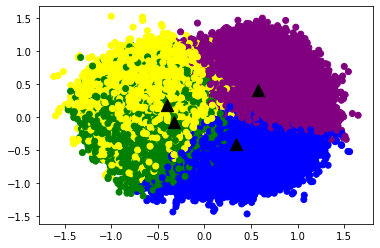

In [192]:
plot_model(d2vmod)

In [18]:
# list of nodes and all nodes connected to each one by alignments
alignment_dict = {}
with open('/home/harry/Downloads/alignments.csv', 'r', encoding="utf-8-sig") as alignments:
    align_reader = csv.reader(alignments)
    for line in align_reader:
        alignment_dict[line[0]] = set(line[1][1:-1].split(','))

In [74]:
# how many alignments are found by doc2vec similarity
found = 0
total = 0
for name, align_set in tqdm(alignment_dict.items()):
    num_aligns = len(align_set)
    similar_docs, _ = zip(*model.docvecs.most_similar(positive=[model.docvecs.doctags[name].offset], topn=num_aligns))
    found += len(align_set & set(similar_docs))
    total += num_aligns

  0%|          | 0/182771 [00:00<?, ?it/s]

In [78]:
# a,b = zip(*model.docvecs.most_similar(positive=[model.docvecs.doctags['data__115__bills__hr__hr1046_75_138'].offset], topn=2))

In [ ]:
with open('/home/harry/PycharmProjects/congress/docs/data__115__bills__s__s1', 'r') as bill:
    bill_reader = csv.reader(bill, delimiter='\t')
    bill_docs = [line[0] for line in bill_reader]

In [68]:
tfidf_docs = {}
_, _, filenames = next(walk('/home/harry/PycharmProjects/congress/docs/'))
for filename in tqdm(filenames):
    with open('/home/harry/PycharmProjects/congress/docs/'+filename, 'r') as bill:
        bill_reader = csv.reader(bill, delimiter='\t')
        for line in bill_reader:
            tfidf_docs[line[0]] = dictionary.doc2bow(lexnlp.nlp.en.tokens.get_token_list(line[1], lowercase=True, stopword=True))


  0%|          | 0/13357 [00:00<?, ?it/s]

In [ ]:
# model.docvecs.most_similar(positive=[model.docvecs.doctags[bill_docs].offset], topn=30)
sims = index[tfidf_docs[bill_docs[1]]]  # p
# sims = sorted(enumerate(sims), key=lambda item: -item[1])
# for doc_position, doc_score in sims[:10]:
#     print(doc_score, docids[doc_position], index_to_original_text(docids[doc_position]))
topk = np.argpartition(sims, -10)[-10:]
sim_dict = {}
for doc_position in topk:
    sim_dict[docids[doc_position]] = sims[doc_position]

In [96]:
@ray.remote #27 min
def multi_overlaps_confidence_tfidf(mod, args, tfidf_id2bow, tfidf_idx2id):
    start = time.time()
    found = 0
    total = 0
    conf_max = 0
    conf_min = 1
    conf_tot = 0
    for name, align_set in args:
        num_aligns = len(align_set)
        sims = mod[tfidf_id2bow[name]]
        topk = np.argpartition(sims, -10)[-10:]
        similar_dict = {}
        for doc_position in topk:
            similar_dict[tfidf_idx2id[doc_position]] = sims[doc_position]
        total += num_aligns
        conf_list = []
        for doc in align_set:
            if doc in similar_dict:
                conf_list.append(similar_dict[doc])
        if len(conf_list) > 0:
            found += len(conf_list)
            conf_max = max(conf_max, max(conf_list))
            conf_min = min(conf_min, min(conf_list))
            conf_tot = conf_tot + sum(conf_list)
    end = time.time()
    print(end - start)
    return found, total, conf_tot, conf_min, conf_max

def get_alignments_accuracy_tfidf(tfidf_index, alignments_dict, tfidf_id2bow, tfidf_idx2id):
    idx_id = ray.put(tfidf_index)
    dict_id = ray.put(tfidf_id2bow)
    ids_id = ray.put(tfidf_idx2id)
    tags_chunks = np.array_split(np.array(list(alignments_dict.items())), 5)
    tasks_pre_launch = [
        multi_overlaps_confidence_tfidf.remote(idx_id, chunk, dict_id, ids_id) for chunk in tags_chunks
    ]
    r = ray.get(tasks_pre_launch)
    found, total, conf_tot, conf_min, conf_max = zip(*r)
    print(f"Accuracy: {sum(found)/sum(total)}, "
          f"Avg Conf: {sum(conf_tot)/sum(total)}, "
          f"Min Conf: {min(conf_min)}, "
          f"Max Conf: {max(conf_max)}")
    return r



@ray.remote
def multi_overlaps(mod, args):
    start = time.time()
    found = 0
    total = 0
    for name, align_set in args:
        num_aligns = len(align_set)
        similar_docs, _ = zip(*mod.most_similar(positive=[mod.doctags[name].offset], topn=num_aligns))
        found += len(align_set & set(similar_docs))
        total += num_aligns

    end = time.time()
    print(end - start)
    return found, total

@ray.remote
def multi_overlaps_confidence_threshold(mod, args):
    start = time.time()
    found = 0
    total = 0
    conf_max = 0
    conf_min = 1
    conf_tot = 0
    for name, align_set in args:
        num_aligns = len(align_set)
        similar_dict = dict(mod.most_similar(positive=[mod.doctags[name].offset], topn=num_aligns))
        total += num_aligns
        conf_list = []
        for doc in align_set:
            if doc in similar_dict:
                if float(similar_dict[doc]) > 0.8:
                    conf_list.append(similar_dict[doc])
        if len(conf_list) > 0:
            found += len(conf_list)
            conf_max = max(conf_max, max(conf_list))
            conf_min = min(conf_min, min(conf_list))
            conf_tot = conf_tot + sum(conf_list)
    end = time.time()
    print(end - start)
    return found, total, conf_tot, conf_min, conf_max

@ray.remote
def multi_overlaps_confidence(mod, args):
    start = time.time()
    found = 0
    total = 0
    conf_max = 0
    conf_min = 1
    conf_tot = 0
    for name, align_set in args:
        num_aligns = len(align_set)
        similar_dict = dict(mod.most_similar(positive=[mod.doctags[name].offset], topn=num_aligns))
        total += num_aligns
        conf_list = []
        for doc in align_set:
            if doc in similar_dict:
                conf_list.append(similar_dict[doc])
        if len(conf_list) > 0:
            found += len(conf_list)
            conf_max = max(conf_max, max(conf_list))
            conf_min = min(conf_min, min(conf_list))
            conf_tot = conf_tot + sum(conf_list)
    end = time.time()
    print(end - start)
    return found, total, conf_tot, conf_min, conf_max

def get_alignments_accuracy_threshold(doc2vec_model, alignments_dict):
    model_id = ray.put(doc2vec_model.docvecs)
    tags_chunks = np.array_split(np.array(list(alignments_dict.items())), 5)
    tasks_pre_launch = [
        multi_overlaps_confidence_threshold.remote(model_id, chunk) for chunk in tags_chunks
    ]
    r = ray.get(tasks_pre_launch)
    found, total, conf_tot, conf_min, conf_max = zip(*r)
    print(f"Accuracy: {sum(found)/sum(total)}, "
          f"Avg Conf: {sum(conf_tot)/sum(total)}, "
          f"Min Conf: {min(conf_min)}, "
          f"Max Conf: {max(conf_max)}")
    return r

def get_alignments_accuracy(doc2vec_model, alignments_dict):
    model_id = ray.put(doc2vec_model.docvecs)
    tags_chunks = np.array_split(np.array(list(alignments_dict.items())), 5)
    tasks_pre_launch = [
        multi_overlaps_confidence.remote(model_id, chunk) for chunk in tags_chunks
    ]
    r = ray.get(tasks_pre_launch)
    found, total, conf_tot, conf_min, conf_max = zip(*r)
    print(f"Accuracy: {sum(found)/sum(total)}, "
          f"Avg Conf: {sum(conf_tot)/sum(total)}, "
          f"Min Conf: {min(conf_min)}, "
          f"Max Conf: {max(conf_max)}")
    return r

In [119]:
ray.shutdown()
ray.init(num_cpus = 5)

2021-04-29 16:59:38,877	INFO services.py:1267 -- View the Ray dashboard at http://127.0.0.1:8265


{'node_ip_address': '192.168.0.190',
 'raylet_ip_address': '192.168.0.190',
 'redis_address': '192.168.0.190:6379',
 'object_store_address': '/tmp/ray/session_2021-04-29_16-59-37_460479_420890/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-04-29_16-59-37_460479_420890/sockets/raylet',
 'webui_url': '127.0.0.1:8265',
 'session_dir': '/tmp/ray/session_2021-04-29_16-59-37_460479_420890',
 'metrics_export_port': 46145,
 'node_id': 'cc3a4d140f25e60779ae35e5251cf78be166016378bb93564ca80925'}

In [188]:
similar_dict = {}
similar_dict_eq = {}
for bill in bill_docs:
    similar_docs = d2vmod.docvecs.most_similar(positive=[d2vmod.docvecs.doctags[bill].offset], topn=10)
    for sim, score in similar_docs:
        name = sim.rsplit("_",2)[0]
        if name in similar_dict:
            similar_dict[name] += score
            similar_dict_eq[name] += 1
        else:
            similar_dict[name] = score
            similar_dict_eq[name] = 1

In [189]:
bills, scores = zip(*similar_dict.items())
topn = np.argsort(-np.array(scores))
np.array(scores)[topn][:30]

8


array([1658.47415698,  965.22815508,  246.74993443,  181.77211624,
        126.42841983,  123.41092718,  102.80006558,   81.48649108,
         77.87481868,   76.29928893,   74.39130473,   68.88009971,
         67.42218703,   66.75535935,   66.04276782,   63.6930415 ,
         63.67589718,   61.39065701,   59.95150948,   57.36542934,
         56.43238217,   56.16943818,   53.16013938,   47.72028059,
         46.8153584 ,   46.52214557,   45.66765827,   43.1027149 ,
         42.82223147,   41.2341066 ])

In [190]:
bills, scores = zip(*similar_dict_eq.items())
topn = np.argsort(-np.array(scores))
np.array(scores)[topn][:30]

{'data__115__bills__s__s1698', 'data__115__bills__hr__hr1262', 'data__115__bills__s__s293', 'data__115__bills__hr__hr828', 'data__115__bills__hr__hr1', 'data__115__bills__hr__hr3524', 'data__115__bills__hr__hr3084', 'data__115__bills__s__s1444'}


array([2006, 1146,  308,  214,  142,  142,  115,   99,   92,   89,   84,
         82,   81,   80,   77,   74,   74,   74,   73,   72,   72,   70,
         67,   59,   56,   56,   54,   54,   53,   52])

In [ ]:
# r0 = get_alignments_accuracy_tfidf(index, alignment_dict, tfidf_docs, docids)

In [121]:
r1 = get_alignments_accuracy(models_by_name[simple_models[0]], alignment_dict)

(pid=575168) 731.6713674068451
(pid=575168) 731.6713674068451
(pid=575168) 731.6713674068451
(pid=575168) 731.6713674068451
(pid=575168) 731.6713674068451
(pid=575168) 731.6713674068451
(pid=575168) 731.6713674068451
(pid=575168) 731.6713674068451
(pid=575168) 731.6713674068451
(pid=575168) 731.6713674068451
(pid=575167) 732.595486164093
(pid=575167) 732.595486164093
(pid=575167) 732.595486164093
(pid=575167) 732.595486164093
(pid=575167) 732.595486164093
(pid=575167) 732.595486164093
(pid=575167) 732.595486164093
(pid=575167) 732.595486164093
(pid=575167) 732.595486164093
(pid=575167) 732.595486164093
(pid=575171) 789.9112827777863
(pid=575171) 789.9112827777863
(pid=575171) 789.9112827777863
(pid=575171) 789.9112827777863
(pid=575171) 789.9112827777863
(pid=575171) 789.9112827777863
(pid=575171) 789.9112827777863
(pid=575171) 789.9112827777863
(pid=575171) 789.9112827777863
(pid=575171) 789.9112827777863
(pid=575170) 790.0510680675507
(pid=575170) 790.0510680675507
(pid=575170) 790.0

In [122]:
# r2 = get_alignments_accuracy_threshold(models_by_name['Doc2Vecdbowd100n5mc2t5lex'], alignment_dict)

In [123]:
r3 = get_alignments_accuracy(models_by_name[simple_models[1]], alignment_dict)

(pid=575168) 745.2679505348206
(pid=575168) 745.2679505348206
(pid=575168) 745.2679505348206
(pid=575168) 745.2679505348206
(pid=575168) 745.2679505348206
(pid=575168) 745.2679505348206
(pid=575168) 745.2679505348206
(pid=575168) 745.2679505348206
(pid=575168) 745.2679505348206
(pid=575168) 745.2679505348206
(pid=575167) 749.4787666797638
(pid=575167) 749.4787666797638
(pid=575167) 749.4787666797638
(pid=575167) 749.4787666797638
(pid=575167) 749.4787666797638
(pid=575167) 749.4787666797638
(pid=575167) 749.4787666797638
(pid=575167) 749.4787666797638
(pid=575167) 749.4787666797638
(pid=575167) 749.4787666797638
(pid=575171) 802.0797574520111
(pid=575171) 802.0797574520111
(pid=575171) 802.0797574520111
(pid=575171) 802.0797574520111
(pid=575171) 802.0797574520111
(pid=575171) 802.0797574520111
(pid=575171) 802.0797574520111
(pid=575171) 802.0797574520111
(pid=575171) 802.0797574520111
(pid=575171) 802.0797574520111
(pid=575170) 802.1529762744904
(pid=575170) 802.1529762744904
(pid=575

In [111]:
found, total, conf_tot, conf_min, conf_max = zip(*r1)
sum(conf_tot)/sum(found)
# sum(total)

0.7795512825223797

In [ ]:
model.docvecs.doctags['data__115__bills__s__s1_42_374'].offset

In [ ]:
top_sim = model.docvecs.most_similar(positive=test_bill, topn=30)

In [ ]:
index_temp = get_tmpfile("d2v_index")
index = Similarity(index_temp, model.docvecs.vectors_docs,num_best=10, num_features=100)  #

In [70]:
top_10 = index[model.docvecs.vectors_docs_norm[103510]]
# top_10_arg = top_10.argsort()[-10:]

In [11]:
model.docvecs.doctags['data__115__bills__s__s1_42_374'].offset

103510

In [12]:
with open('/home/harry/PycharmProjects/congress/docs/data__115__bills__s__s1', 'r') as bill:
    bill_reader = csv.reader(bill, delimiter='\t')
    test_bill = [model.docvecs.doctags[line[0]].offset for line in bill_reader]

In [14]:
bill_dict = {}
similar_docs = model.docvecs.most_similar(positive=test_bill, topn=len(model.docvecs.doctags))
for doc,sim in similar_docs:
    if sim < 0.8:
        break
    idx = doc.rsplit('_',2)[0]
    if idx in bill_dict:
        bill_dict[idx] += 1
    else:
        bill_dict[idx] = 1

bill_keys, bill_values = zip(*bill_dict.items())
arg_idx = list(reversed(np.array(bill_values).argsort()))

In [15]:
np.array(bill_keys)[arg_idx[:30]]

array(['data__115__bills__s__s3042', 'data__115__bills__hr__hr1285',
       'data__115__bills__s__s3660', 'data__115__bills__hr__hr5785',
       'data__115__bills__s__s2018', 'data__115__bills__s__s2977',
       'data__115__bills__s__s2184', 'data__115__bills__hr__hr6543',
       'data__115__bills__s__s2906', 'data__115__bills__hr__hr7334',
       'data__115__bills__hr__hr691', 'data__115__bills__hr__hr3043',
       'data__115__bills__s__s3799', 'data__115__bills__hr__hr151',
       'data__115__bills__s__s3781', 'data__115__bills__s__s3712',
       'data__115__bills__hr__hr5917', 'data__115__bills__s__s1112',
       'data__115__bills__s__s458', 'data__115__bills__hr__hr6450',
       'data__115__bills__hr__hr4743', 'data__115__bills__sres__sres673',
       'data__115__bills__s__s1460', 'data__115__bills__hr__hr3219',
       'data__115__bills__hr__hr1710', 'data__115__bills__hres__hres926',
       'data__115__bills__hres__hres1082', 'data__115__bills__s__s3136',
       'data__115__bills_

In [16]:
np.array(bill_values)[arg_idx[:30]]

array([3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [105]:
from datetime import datetime
# datetime.fromisoformat('2011-11-04')
doc_dates = {}
bill_docs = []
_, _, filenames = next(walk('/home/harry/PycharmProjects/congress/docs/'))
for file_part in filenames:
    with open(f'/home/harry/PycharmProjects/congress/docs/{file_part}', 'r') as csv_file:
        bill_reader = csv.reader(csv_file, delimiter='\t')
        for line in bill_reader:
            doc_dates[line[0]] = datetime.fromisoformat(line[2])
            bill_docs.append(line[0])


In [57]:
with open('/home/harry/PycharmProjects/congress/docs/data__115__bills__s__s1', 'r') as bill:
    bill_reader = csv.reader(bill, delimiter='\t')
    bill_docs = [line[0] for line in bill_reader]

In [ ]:
hash_set = set()
count = 0
with open('doc2vec_relationships.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for bill in tqdm(bill_docs):
        similar_docs = model.docvecs.most_similar(positive=[model.docvecs.doctags[bill].offset], topn=30)
        for doc,sim in similar_docs:
            if sim < 0.95:
                break
            curr_hash = hash(doc+bill)
            if curr_hash not in hash_set:
                hash_set.add(curr_hash)
                if doc_dates[doc] < doc_dates[bill] or (doc_dates[doc] == doc_dates[bill] and doc < bill):
                    writer.writerow([doc,bill,sim])
                else:
                    writer.writerow([bill,doc,sim])
                count += 1
count